Extra Trees Baseline

In [24]:
# ✅ STEP 1 — Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# ✅ STEP 2 — Load your final clean reshaped dataset
df = pd.read_csv('../data/processed/Final_Model_Ready_Clean.csv')

In [ ]:
#df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
#df.set_index('Date', inplace=True)

In [26]:
print(df.dtypes)

Date                          object
Wind_GWh                     float64
Solar_GWh                    float64
Wind_Speed_10m               float64
Temperature_Celsius          float64
Cloud_Cover                  float64
Solar_Radiation_MJ_per_m2    float64
Wind_Capacity_MW             float64
Solar_Capacity_MW            float64
East_Solar_DSO_MW            float64
East_Solar_TSO_MW            float64
East_Wind_DSO_MW             float64
East_Wind_TSO_MW             float64
North_Wind_DSO_MW            float64
North_Wind_TSO_MW            float64
South_Solar_DSO_MW           float64
South_Solar_TSO_MW             int64
South_Wind_DSO_MW            float64
South_Wind_TSO_MW            float64
West_Solar_DSO_MW            float64
West_Wind_DSO_MW             float64
West_Wind_TSO_MW               int64
dtype: object


In [ ]:
# df.to_excel('../data/processed/Final_Model_Ready_no_lags.xlsx', index=True)
# print("✅ File saved with Date as index.")

✅ File saved with Date as index.


In [27]:
print("Shape:", df.shape)                # Rows and columns
print("Columns:", df.columns.tolist())  # Column names
df.info()                                # Data types and non-null counts

Shape: (180, 22)
Columns: ['Date', 'Wind_GWh', 'Solar_GWh', 'Wind_Speed_10m', 'Temperature_Celsius', 'Cloud_Cover', 'Solar_Radiation_MJ_per_m2', 'Wind_Capacity_MW', 'Solar_Capacity_MW', 'East_Solar_DSO_MW', 'East_Solar_TSO_MW', 'East_Wind_DSO_MW', 'East_Wind_TSO_MW', 'North_Wind_DSO_MW', 'North_Wind_TSO_MW', 'South_Solar_DSO_MW', 'South_Solar_TSO_MW', 'South_Wind_DSO_MW', 'South_Wind_TSO_MW', 'West_Solar_DSO_MW', 'West_Wind_DSO_MW', 'West_Wind_TSO_MW']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       180 non-null    object 
 1   Wind_GWh                   180 non-null    float64
 2   Solar_GWh                  180 non-null    float64
 3   Wind_Speed_10m             180 non-null    float64
 4   Temperature_Celsius        180 non-null    float64
 5   Cloud_Cover                180 non-null  

In [28]:
print(df.head())       # First 5 rows
print(df.tail())       # Last 5 rows
print(df.sample(5))    # 5 random rows

         Date  Wind_GWh  Solar_GWh  Wind_Speed_10m  Temperature_Celsius  \
0  2010-01-01   248.002        0.0        0.786551             4.149077   
1  2010-01-02   150.952        0.0        1.154458             4.126316   
2  2010-01-03   251.394        0.0        0.872089             6.327460   
3  2010-01-04   186.269        0.0        1.295724             8.733235   
4  2010-01-05   168.528        0.0        1.649233            10.533146   

   Cloud_Cover  Solar_Radiation_MJ_per_m2  Wind_Capacity_MW  \
0     0.668563                  2971663.8          1270.807   
1     0.694220                  5765193.0          1286.107   
2     0.653995                 10048856.0          1303.657   
3     0.674453                 16062960.0          1313.647   
4     0.653326                 18700240.0          1313.647   

   Solar_Capacity_MW  East_Solar_DSO_MW  ...  East_Wind_TSO_MW  \
0                0.6            106.609  ...             525.4   
1                0.6            106.60

In [29]:
print(df.isnull().sum())          # Count of NaNs per column
print(df.isnull().mean() * 100)   # Percentage of missing values

Date                         0
Wind_GWh                     0
Solar_GWh                    0
Wind_Speed_10m               0
Temperature_Celsius          0
Cloud_Cover                  0
Solar_Radiation_MJ_per_m2    0
Wind_Capacity_MW             0
Solar_Capacity_MW            0
East_Solar_DSO_MW            0
East_Solar_TSO_MW            0
East_Wind_DSO_MW             0
East_Wind_TSO_MW             0
North_Wind_DSO_MW            0
North_Wind_TSO_MW            0
South_Solar_DSO_MW           0
South_Solar_TSO_MW           0
South_Wind_DSO_MW            0
South_Wind_TSO_MW            0
West_Solar_DSO_MW            0
West_Wind_DSO_MW             0
West_Wind_TSO_MW             0
dtype: int64
Date                         0.0
Wind_GWh                     0.0
Solar_GWh                    0.0
Wind_Speed_10m               0.0
Temperature_Celsius          0.0
Cloud_Cover                  0.0
Solar_Radiation_MJ_per_m2    0.0
Wind_Capacity_MW             0.0
Solar_Capacity_MW            0.0
East_Sol

In [31]:
df.describe().transpose()         # Summary stats for numeric columns

,count,mean,std,min,25%,50%,75%,max
Wind_GWh,180.0,6.376872e+02,3.263329e+02,1.403120e+02,3.715745e+02,5.760815e+02,8.490857e+02,1.537470e+03
Solar_GWh,180.0,6.320544e+00,1.976149e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.154570e+02
Wind_Speed_10m,180.0,2.794291e+00,1.459640e+00,4.597704e-01,1.682399e+00,2.536248e+00,3.710669e+00,7.313563e+00
Temperature_Celsius,180.0,1.047110e+01,3.276752e+00,2.989208e+00,7.602287e+00,9.974626e+00,1.362777e+01,1.667829e+01
Cloud_Cover,180.0,7.385691e-01,5.896700e-02,5.256135e-01,7.031595e-01,7.423704e-01,7.809324e-01,8.937073e-01
Solar_Radiation_MJ_per_m2,180.0,1.017259e+07,6.226822e+06,1.540266e+06,3.743720e+06,9.970121e+06,1.626085e+07,2.150320e+07
Wind_Capacity_MW,180.0,3.074946e+03,1.203709e+03,1.270807e+03,1.879037e+03,3.041984e+03,4.332721e+03,4.934091e+03
Solar_Capacity_MW,180.0,6.049333e+01,1.151113e+02,0.000000e+00,7.000000e-01,5.100000e+00,8.990000e+01,4.452000e+02
East_Solar_DSO_MW,180.0,1.066090e+02,2.850099e-13,1.066090e+02,1.066090e+02,1.066090e+02,1.066090e+02,1.066090e+02
East_Solar_TSO_MW,180.0,5.206000e+02,1.026036e-12,5.206000e+02,5.206000e+02,5.206000e+02,5.206000e+02,5.206000e+02


In [32]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

Date: 180 unique values
Wind_GWh: 180 unique values
Solar_GWh: 30 unique values
Wind_Speed_10m: 180 unique values
Temperature_Celsius: 180 unique values
Cloud_Cover: 180 unique values
Solar_Radiation_MJ_per_m2: 180 unique values
Wind_Capacity_MW: 125 unique values
Solar_Capacity_MW: 14 unique values
East_Solar_DSO_MW: 1 unique values
East_Solar_TSO_MW: 1 unique values
East_Wind_DSO_MW: 1 unique values
East_Wind_TSO_MW: 1 unique values
North_Wind_DSO_MW: 1 unique values
North_Wind_TSO_MW: 1 unique values
South_Solar_DSO_MW: 1 unique values
South_Solar_TSO_MW: 1 unique values
South_Wind_DSO_MW: 1 unique values
South_Wind_TSO_MW: 1 unique values
West_Solar_DSO_MW: 1 unique values
West_Wind_DSO_MW: 1 unique values
West_Wind_TSO_MW: 1 unique values


In [ ]:
#import pandas as pd

# Load and set index just once
#df = pd.read_csv('../data/processed/Final_Model_Ready_Clean_Reshaped.csv', parse_dates=['Date'])
#df.set_index('Date', inplace=True)

# Save with index (Date) preserved
#df.to_csv('../data/processed/Final_Model_Ready_Clean.csv', index=True)
#print("✅ Saved with Date as index.")


✅ Saved with Date as index.


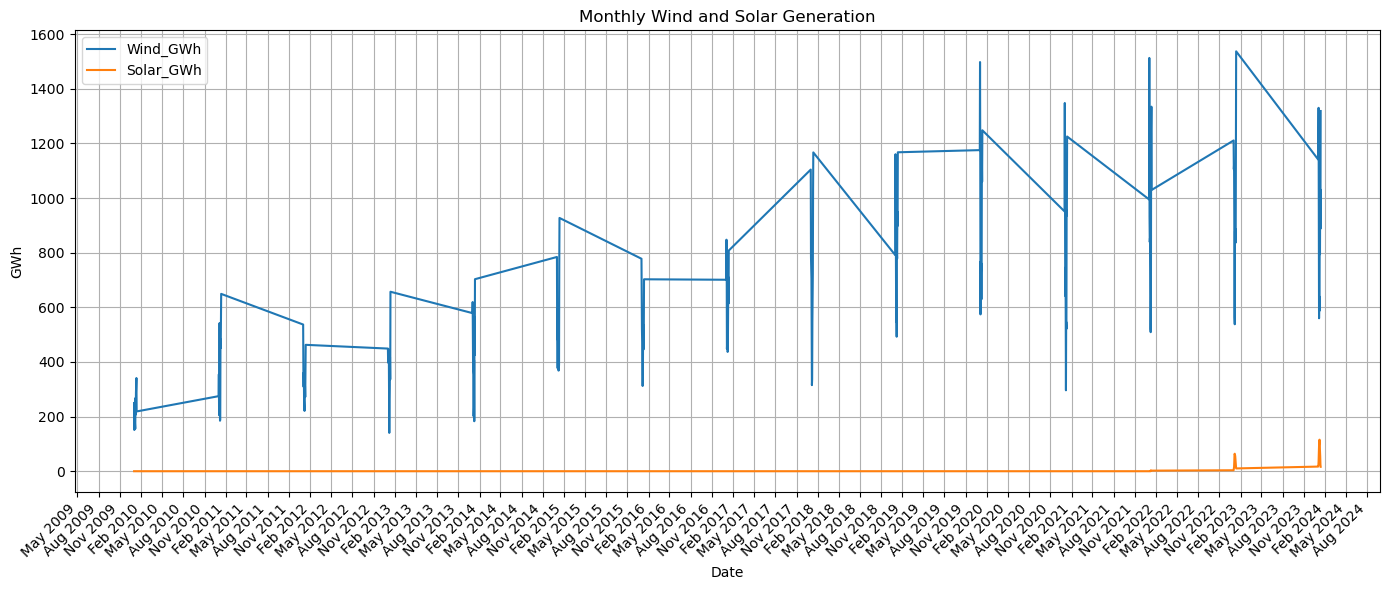

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 💡 Cleanest way to load
df = pd.read_csv('../data/processed/Final_Model_Ready_Clean.csv', index_col='Date', parse_dates=True)

# Plot
fig, ax = plt.subplots(figsize=(14, 6))
df[['Wind_GWh', 'Solar_GWh']].plot(ax=ax)

# Formatting
ax.set_title('Monthly Wind and Solar Generation')
ax.set_ylabel('GWh')
ax.set_xlabel('Date')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


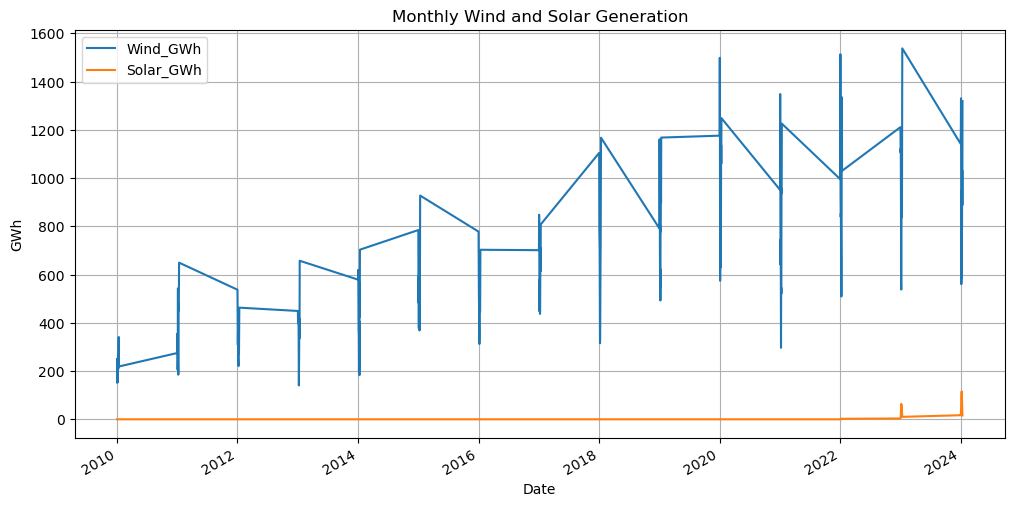

In [34]:
import matplotlib.pyplot as plt

df[['Wind_GWh', 'Solar_GWh']].plot(figsize=(12, 6), title='Monthly Wind and Solar Generation')
plt.ylabel('GWh')
plt.xlabel('Date')
plt.grid(True)
plt.show()


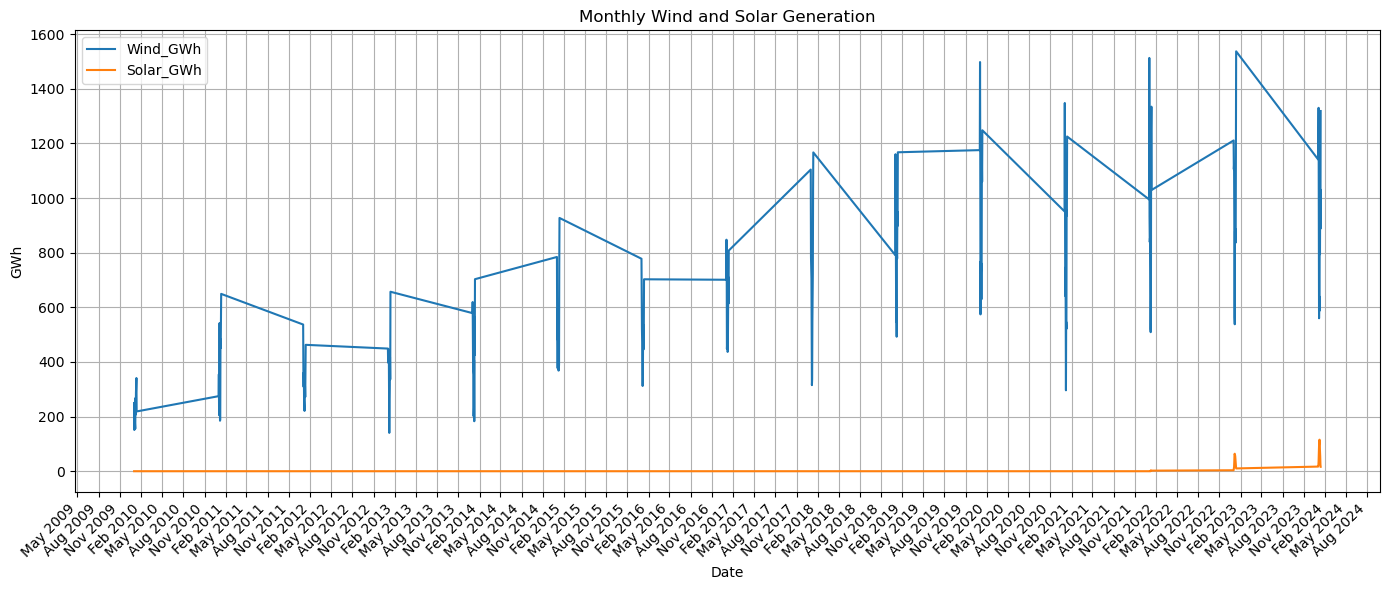

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates

# # Reload the CSV (or Excel) to avoid any broken index
# df = pd.read_excel('../data/processed/Final_Model_Ready_no_lags.xlsx')

# # ✅ Convert Date column to datetime again (safe re-parsing)
# df['Date'] = pd.to_datetime(df['Date'], errors='coerce', format='%Y-%m-%d')

# # ✅ Set it as index
# df.set_index('Date', inplace=True)

# # ✅ Drop rows with NaT if any (due to parsing issues)
# df = df.dropna()

# # ✅ Now plot with correct x-axis formatting
# fig, ax = plt.subplots(figsize=(14, 6))
# df[['Wind_GWh', 'Solar_GWh']].plot(ax=ax)

# # Format x-axis
# ax.set_title('Monthly Wind and Solar Generation')
# ax.set_ylabel('GWh')
# ax.set_xlabel('Date')
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Jan 2020
# ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Every 3 months
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.tight_layout()
# plt.show()



In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates

# # ✅ Step 1: Load the CSV and parse Date while reading
# df = pd.read_csv('../data/processed/Final_Model_Ready_Clean_Reshaped.csv', parse_dates=['Date'])

# # ✅ Step 2: Set 'Date' as index
# df.set_index('Date', inplace=True)

# # ✅ Optional: Confirm index is correct
# print(df.index.min(), df.index.max())
# print(df.index.dtype)  # Should print datetime64[ns]

# # ✅ Step 3: Plot with properly formatted x-axis
# fig, ax = plt.subplots(figsize=(14, 6))
# df[['Wind_GWh', 'Solar_GWh']].plot(ax=ax)

# # Format x-axis for dates
# ax.set_title('Monthly Wind and Solar Generation')
# ax.set_ylabel('GWh')
# ax.set_xlabel('Date')
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
# ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.tight_layout()
# plt.show()


In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates

# # ✅ Load Excel
# df = pd.read_excel('../data/processed/Final_Model_Ready_no_lags.xlsx')

# # ✅ Convert and set index
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)

# # ✅ Plot using datetime index explicitly
# fig, ax = plt.subplots(figsize=(14, 6))
# ax.plot(df.index, df['Wind_GWh'], label='Wind_GWh')
# ax.plot(df.index, df['Solar_GWh'], label='Solar_GWh')

# # ✅ Format x-axis with month labels
# ax.set_title('Monthly Wind and Solar Generation')
# ax.set_ylabel('GWh')
# ax.set_xlabel('Date')
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
# ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
# plt.xticks(rotation=45)
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()


In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates

# # ✅ Load Excel
# df = pd.read_csv('../data/processed/Final_Model_Ready_no_lags.csv')

# # ✅ Convert and set index
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)

# # ✅ Plot using datetime index explicitly
# fig, ax = plt.subplots(figsize=(14, 6))
# ax.plot(df.index, df['Wind_GWh'], label='Wind_GWh')
# ax.plot(df.index, df['Solar_GWh'], label='Solar_GWh')

# # ✅ Format x-axis with month labels
# ax.set_title('Monthly Wind and Solar Generation')
# ax.set_ylabel('GWh')
# ax.set_xlabel('Date')
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
# ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
# plt.xticks(rotation=45)
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()


In [16]:
print(df.index.min())
print(df.index.max())


2010-01-01 00:00:00
2024-01-12 00:00:00


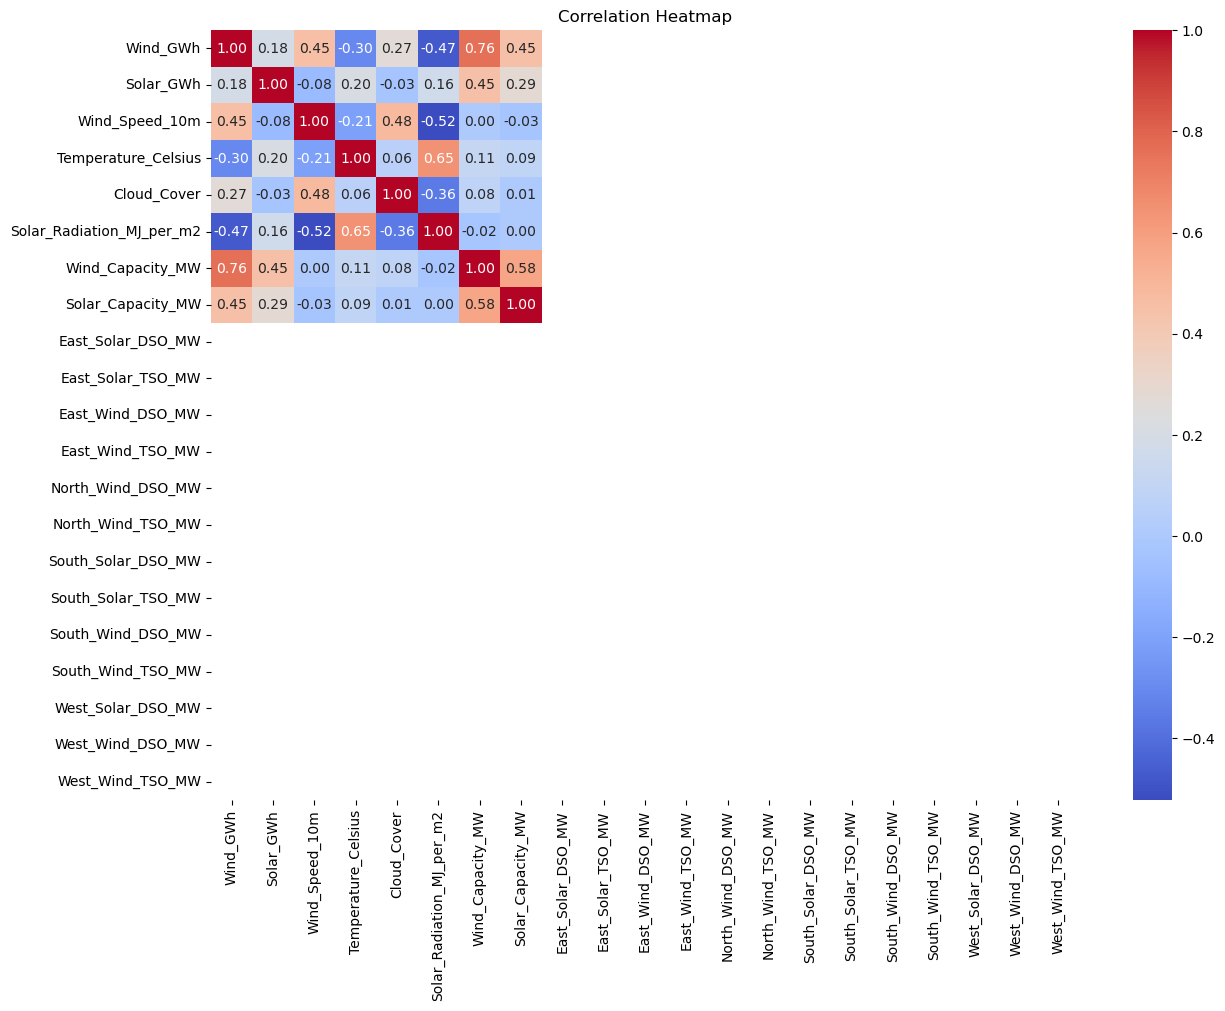

In [35]:
import seaborn as sns
import numpy as np

plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


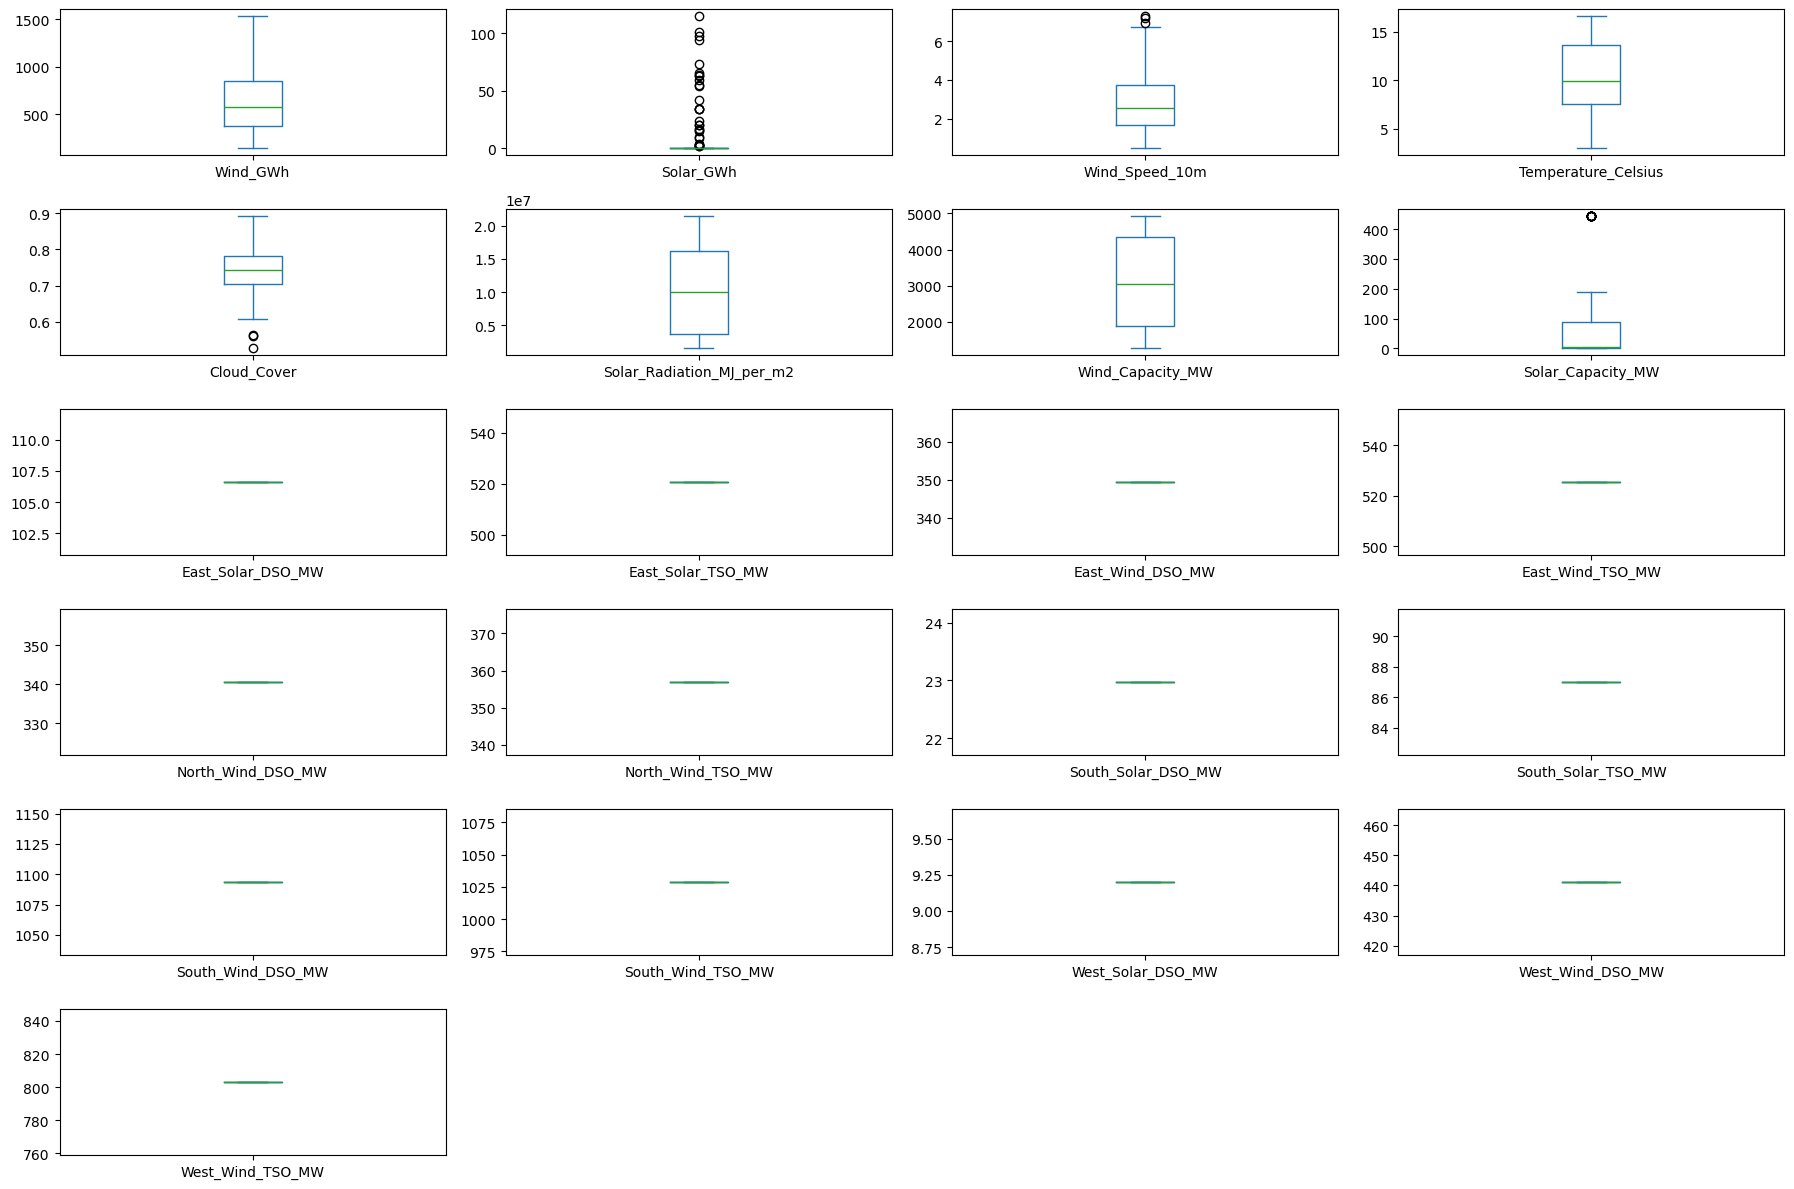

In [37]:
df.plot(kind='box', subplots=True, layout=(6, 4), figsize=(18, 12), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

In [38]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


Step-by-Step Code for Phase 1

In [39]:
# Load your dataset
file_path = '../data/processed/Final_Model_Ready_Clean.csv'
df = pd.read_csv(file_path)

# Drop the Date column
df = df.drop(columns=['Date'])

# Define target and features
target = 'Solar_GWh'  # Change to 'Solar_GWh' if needed later
X = df.drop(columns=[target])
y = df[target]

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # No shuffling for time-series style consistency
)

# Check shapes
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (144, 20)
X_test shape: (36, 20)
y_train shape: (144,)
y_test shape: (36,)


Phase 2 Code Block: Baseline Extra Trees Regressor

In [41]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import time

# Start timer
start_time = time.time()

# Initialize and train the model
etr = ExtraTreesRegressor(n_estimators=100, random_state=42)
etr.fit(X_train, y_train)

# Predict
y_pred = etr.predict(X_test)

# End timer
end_time = time.time()
training_time = end_time - start_time

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Extra Trees Baseline Results (No Lags):")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.3f}")
print(f"Training time: {training_time:.2f} seconds")

Extra Trees Baseline Results (No Lags):
MAE:  31.60
RMSE: 46.28
R²:   -0.874
Training time: 0.05 seconds


In [42]:
from scripts.log_utils import log_model_performance, save_log_to_csv

# After training your model:
log = log_model_performance(
    model_name="ExtraTrees_Baseline_NoLags",
    target_variable="Solar_GWh",
    X_train=X_train,
    X_test=X_test,
    y_test=y_test,
    y_pred=y_pred,
    model_object=etr,
    training_time_sec=training_time,
    tuning_type="None",
    extra_notes="Baseline Extra Trees using no lag or rolling features."
)

# Save CSV
save_log_to_csv(log)


ModuleNotFoundError: No module named 'scripts.log_utils'

STEP 1: Setup — Copy and Define the Logging Function

In [69]:
import json
import os
import platform
import time
import psutil
import numpy as np
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def log_model_performance(
    model_name,
    target_variable,
    X_train,
    X_test,
    y_test,
    y_pred,
    model_object,
    training_time_sec,
    dataset_name="Final_Model_Ready_Clean_Reshaped",
    tuning_type="None",
    extra_notes=""
):
    # Evaluate predictions
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Inference time per sample
    start_infer = time.time()
    _ = model_object.predict(X_test[:1])
    end_infer = time.time()
    inference_time = round((end_infer - start_infer), 6)

    # Save temp model to measure size
    joblib.dump(model_object, "temp_model.pkl")
    model_size_mb = round(os.path.getsize("temp_model.pkl") / 1e6, 2)

    # Logging dictionary
    log_dict = {
        "model_name": model_name,
        "target": target_variable,
        "dataset_used": dataset_name,
        "training_samples": X_train.shape[0],
        "test_samples": X_test.shape[0],
        "n_features": X_train.shape[1],
        "input_shape": X_train.shape,
        "mae": round(mae, 2),
        "rmse": round(rmse, 2),
        "r2_score": round(r2, 3),
        "training_time_sec": round(training_time_sec, 2),
        "inference_time_per_sample_sec": inference_time,
        "model_size_mb": model_size_mb,
        "tuning_type": tuning_type,
        "system_info": {
            "platform": platform.system(),
            "platform_version": platform.version(),
            "processor": platform.processor(),
            "cpu_count": psutil.cpu_count(logical=True),
            "gpu_used": "NVIDIA GeForce RTX 2050"  # Update if dynamic detection added
        },
        "notes": extra_notes
    }

    # Create directory if it doesn't exist
    os.makedirs("outputs/logs/", exist_ok=True)


    # Save log to JSON file
    filename = "../outputs/logs/ExtraTrees_Baseline_NoLags_log.json"
    with open(filename, "w") as f:
      json.dump(log_dict, f, indent=4)


    print(f"✅ Model log saved to: {filename}")
    return log_dict


STEP 2: Call the Function with Your Model and Data

In [70]:
log_model_performance(
    model_name="ExtraTrees_Baseline_NoLags",
    target_variable="Wind_GWh",
    X_train=X_train,
    X_test=X_test,
    y_test=y_test,
    y_pred=y_pred,
    model_object=etr,
    training_time_sec=training_time,
    tuning_type="None",
    extra_notes="Baseline model using only raw features without lags or rolling mean."
)


✅ Model log saved to: ../outputs/logs/ExtraTrees_Baseline_NoLags_log.json


{'model_name': 'ExtraTrees_Baseline_NoLags',
 'target': 'Wind_GWh',
 'dataset_used': 'Final_Model_Ready_Clean_Reshaped',
 'training_samples': 144,
 'test_samples': 36,
 'n_features': 20,
 'input_shape': (144, 20),
 'mae': 185.01,
 'rmse': 232.7,
 'r2_score': 0.292,
 'training_time_sec': 0.07,
 'inference_time_per_sample_sec': 0.002812,
 'model_size_mb': 2.1,
 'tuning_type': 'None',
 'system_info': {'platform': 'Windows',
  'platform_version': '10.0.26100',
  'processor': 'Intel64 Family 6 Model 154 Stepping 3, GenuineIntel',
  'cpu_count': 16,
  'gpu_used': 'NVIDIA GeForce RTX 2050'},
 'notes': 'Baseline model using only raw features without lags or rolling mean.'}

Code to Save CSV Log

In [75]:
baseline_log = {
    "model_name": "ExtraTrees_Baseline_NoLags",
    "target": "Wind_GWh",
    "dataset_used": "Final_Model_Ready_Clean_Reshaped",
    "training_samples": 144,
    "test_samples": 36,
    "n_features": 20,
    "input_shape": (144, 20),
    "mae": 185.01,
    "rmse": 232.7,
    "r2_score": 0.292,
    "training_time_sec": 0.07,
    "inference_time_per_sample_sec": 0.005851,
    "model_size_mb": 2.1,
    "tuning_type": "None",
    "system_info": {
        "platform": "Windows",
        "platform_version": "10.0.26100",
        "processor": "Intel64 Family 6 Model 154 Stepping 3, GenuineIntel",
        "cpu_count": 16,
        "gpu_used": "NVIDIA GeForce RTX 2050"
    },
    "notes": "Baseline model using only raw features without lags or rolling mean."
}
